# What turnout tells us
> Go through turnout in different cities.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

# Education and Turnout

(Will discuss some demographic characteristics usually mentioned in Taiwan’s elections and their correlation with support/turnout)




## Front Matter

The first cell in your Jupyter Notebook or markdown blog post contains front matter. Front matter is metadata that can turn on/off options in your Notebook. It is formatted like this:

```
# Title
> Awesome summary

- toc: true- branch: master- badges: true
- comments: true
- author: Hamel Husain & Jeremy Howard
- categories: [fastpages, jupyter]
```

- Setting `toc: true` will automatically generate a table of contents
- Setting `badges: true` will automatically include GitHub and Google Colab links to your notebook.
- Setting `comments: true` will enable commenting on your blog post, powered by [utterances](https://github.com/utterance/utterances).

More details and options for front matter can be viewed on the [front matter section](https://github.com/fastai/fastpages#front-matter-related-options) of the README.

## Markdown Shortcuts

A `#hide` comment at the top of any code cell will hide **both the input and output** of that cell in your blog post.

A `#hide_input` comment at the top of any code cell will **only hide the input** of that cell.

In [1]:
#hide_input
print('The comment #hide_input was used to hide the code that produced this.')

The comment #hide_input was used to hide the code that produced this.


put a `#collapse-hide` flag at the top of any cell if you want to **hide** that cell by default, but give the reader the option to show it:

In [13]:
#collapse-hide
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

put a `#collapse-show` flag at the top of any cell if you want to **show** that cell by default, but give the reader the option to hide it:

## Interactive Charts With Altair

Charts made with Altair remain interactive.  Example charts taken from [this repo](https://github.com/uwdata/visualization-curriculum), specifically [this notebook](https://github.com/uwdata/visualization-curriculum/blob/master/altair_interaction.ipynb).

In [ ]:
#collapse-show
margin_pr = pd.read_csv("margin_pr_turnout.csv")
margin_records = pd.read_csv("margin_pr_turnout.csv")
edu_pr = pd.read_csv("edu_pr_turnout.csv")
edu_records = pd.read_csv("edu_records.csv")

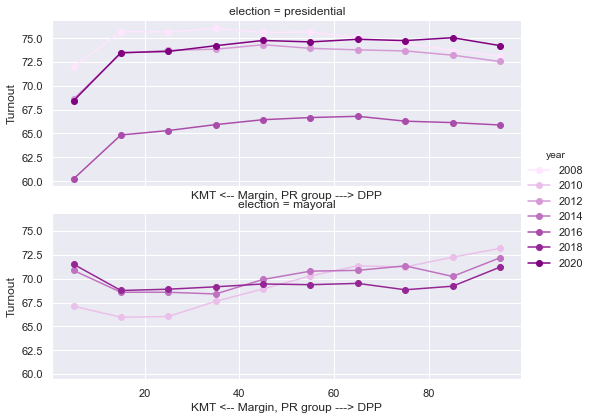

In [35]:
sns.set(style="darkgrid")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(margin_pr, col="election", hue="year", palette=sns.light_palette("purple", n_colors=7), 
                     col_wrap=1, height=3, aspect=2.5)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "margin_pr_interval_by_year", "avg_turnout", marker="o").add_legend() \
.set(xlabel = 'KMT <-- Margin, PR group ---> DPP', 
     ylabel = 'Turnout' )


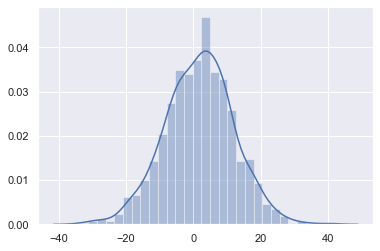

In [44]:
%matplotlib inline
from ipywidgets import interact
import ipywidgets as widgets
import numpy as np

def f(var):
    sns.distplot(np.random.normal(1, var, 1000))
    plt.show()
    
# interact(f, var = (1,10))
interact(f, var=widgets.IntSlider(min=0, max=30, step=5, value=10));

In [12]:
line = alt.Chart(margin_pr).mark_line(point = True).encode(
    alt.Y("avg_turnout:Q",
        scale=alt.Scale(zero=False)
    ),
    x = "margin_pr_interval_by_year",
    color = "year:O"
).properties(
    width = 350,
    height = 200
).facet(
    facet = "election",
    columns = 1
)

line

ValueError: Faceted charts cannot be layered.

### Example 1: DropDown

In [5]:
# single-value selection over [Major_Genre, MPAA_Rating] pairs
# use specific hard-wired values as the initial selected values
selection = alt.selection_single(
    name='Select',
    fields=['Major_Genre', 'MPAA_Rating'],
    init={'Major_Genre': 'Drama', 'MPAA_Rating': 'R'},
    bind={'Major_Genre': alt.binding_select(options=genres), 'MPAA_Rating': alt.binding_radio(options=mpaa)}
)
  
# scatter plot, modify opacity based on selection
alt.Chart(movies).mark_circle().add_selection(
    selection
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y='IMDB_Rating:Q',
    tooltip='Title:N',
    opacity=alt.condition(selection, alt.value(0.75), alt.value(0.05))
)

alt.Chart(...)

### Example 2: Tooltips

In [6]:
alt.Chart(movies).mark_circle().add_selection(
    alt.selection_interval(bind='scales', encodings=['x'])
).encode(
    x='Rotten_Tomatoes_Rating:Q',
    y=alt.Y('IMDB_Rating:Q', axis=alt.Axis(minExtent=30)), # use min extent to stabilize axis title placement
    tooltip=['Title:N', 'Release_Date:N', 'IMDB_Rating:Q', 'Rotten_Tomatoes_Rating:Q']
).properties(
    width=600,
    height=400
)

alt.Chart(...)

### Example 3: More Tooltips

In [7]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q', scale=alt.Scale(type='log')),
    alt.Color('symbol:N')
)

alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='date:T'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='price:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='price:Q'
    ).transform_filter(label),
    
    data=stocks
).properties(
    width=700,
    height=400
)

alt.LayerChart(...)

## Data Tables

You can display tables per the usual way in your blog:

In [11]:
movies = 'https://vega.github.io/vega-datasets/data/movies.json'
df = pd.read_json(movies)
# display table with pandas
df[['Title', 'Worldwide_Gross', 
    'Production_Budget', 'Distributor', 'MPAA_Rating', 'IMDB_Rating', 'Rotten_Tomatoes_Rating']].head()

,Title,Worldwide_Gross,Production_Budget,Distributor,MPAA_Rating,IMDB_Rating,Rotten_Tomatoes_Rating
0,The Land Girls,146083.0,8000000.0,Gramercy,R,6.1,NaN
1,"First Love, Last Rites",10876.0,300000.0,Strand,R,6.9,NaN
2,I Married a Strange Person,203134.0,250000.0,Lionsgate,None,6.8,NaN
3,Let's Talk About Sex,373615.0,300000.0,Fine Line,None,NaN,13.0
4,Slam,1087521.0,1000000.0,Trimark,R,3.4,62.0


## Images

### Local Images

You can reference local images and they will be copied and rendered on your blog automatically.  You can include these with the following markdown syntax:

`![](my_icons/fastai_logo.png)`

![](my_icons/fastai_logo.png)

### Remote Images

Remote images can be included with the following markdown syntax:

`![](https://image.flaticon.com/icons/svg/36/36686.svg)`

![](https://image.flaticon.com/icons/svg/36/36686.svg)

### Animated Gifs

Animated Gifs work, too!

`![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)`

![](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif)

### Captions

You can include captions with markdown images like this:

```
![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")
```


![](https://www.fast.ai/images/fastai_paper/show_batch.png "Credit: https://www.fast.ai/2020/02/13/fastai-A-Layered-API-for-Deep-Learning/")





# Other Elements

## Tweetcards

Typing `> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20` will render this:

> twitter: https://twitter.com/jakevdp/status/1204765621767901185?s=20

## Youtube Videos

Typing `> youtube: https://youtu.be/XfoYk_Z5AkI` will render this:


> youtube: https://youtu.be/XfoYk_Z5AkI

## Boxes / Callouts 

Typing `> Warning: There will be no second warning!` will render this:


> Warning: There will be no second warning!



Typing `> Important: Pay attention! It's important.` will render this:

> Important: Pay attention! It's important.



Typing `> Tip: This is my tip.` will render this:

> Tip: This is my tip.



Typing `> Note: Take note of this.` will render this:

> Note: Take note of this.



Typing `> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.` will render in the docs:

> Note: A doc link to [an example website: fast.ai](https://www.fast.ai/) should also work fine.

## Footnotes

You can have footnotes in notebooks, however the syntax is different compared to markdown documents. [This guide provides more detail about this syntax](https://github.com/fastai/fastpages/blob/master/_fastpages_docs/NOTEBOOK_FOOTNOTES.md), which looks like this:

```
{% raw %}For example, here is a footnote {% fn 1 %}.
And another {% fn 2 %}
{{ 'This is the footnote.' | fndetail: 1 }}
{{ 'This is the other footnote. You can even have a [link](www.github.com)!' | fndetail: 2 }}{% endraw %}
```

For example, here is a footnote {% fn 1 %}.

And another {% fn 2 %}

{{ 'This is the footnote.' | fndetail: 1 }}
{{ 'This is the other footnote. You can even have a [link](www.github.com)!' | fndetail: 2 }}